# Mejorando el metodo de Euler





Mejorando Euler:

$$y_{n+1}=y_n+h*f(x_n,y_n)$$

Tenemos que si sumamos...

$$ \int_{x_n}^{x_{n+1}}y'(x)dx=\int_{x_n}^{x_{n+1}}f(x,y)dx$$

Tenemos  entonces que:

$$y(x_{n+1})-y(x_n)=\int_{x_n}^{x_{n+1}}f(x,y)dx.....(*)$$ 

Despejando:

$$y(x_{n+1})=y(x_n)+\int_{x_n}^{x_{n+1}}f(x,y)dx.....(*)$$

Entonces tenemos que:

$$y_{n+1}= y_n+\int_{x_n}^{x_{n+1}}f(x,y)dx$$

Desarrollando en serie de Taylor

$$f(x,y)=f(x_n,y_n)+f'(x_n,y_n)h+f''(x_n,y_n)\dfrac{h^2}{2!}+O(h^3)$$

Es decir que aproximando a primer orden tenemos:

$$f(x,y)\simeq f(x_n,y_n)+O(h)$$

Una opción es:

$$ y_{n+1}=y_n+hf(x_n,y_n)+O(h^2)$$

dónde $O(h^2)=hO(h)$
Una mejor opción es: 

$$ y_{n+1}=y_n+f'(x_n,y_n)h+O(h^2)$$

derivando

$$ \dfrac{d}{dx}f(x,y)= \dfrac{\partial f}{\partial x} + \dfrac{\partial f}{\partial y}\dfrac{dy}{dx}= \dfrac{\partial f}{\partial x} + \dfrac{\partial f}{\partial y}f$$

dentro de $(*)$

$$ y_{n+1}=y_n+hf(x_n,y_n)+ \dfrac{h^2}{2}\left( \dfrac{\partial f}{\partial x} + \dfrac{\partial f}{\partial y}f\right)+O(h^3)$$

Ahora veamos la segunda derivada

$$ \dfrac{d^2}{dx^2}f(x,y) = \dfrac{d}{dx}\left(\dfrac{\partial f}{\partial x} + \dfrac{\partial f}{\partial y}f\right)$$

Derivando tenemos:

$$ \dfrac{\partial ^2 f}{\partial x^2} + \left(\dfrac{\partial ^2 f}{\partial y \partial x}+\dfrac{\partial ^2 f}{\partial y ^2}\right)f +\left(\dfrac{\partial f}{\partial x} + \dfrac{\partial f}{\partial y}f\right)^2 $$

$$\vec{y_{n+1}} = \vec{f(x,\vec{y})}$$

Vamos a programar:
$$ y_{n+1}=y_n+hf(x_n,y_n)+ \dfrac{h^2}{2}\left( \dfrac{\partial f}{\partial x} + \dfrac{\partial f}{\partial y}f\right)$$

donde $f$ y sus parciales están evaluadas en $f(x_n,y_n)$


In [20]:
from pylab import *
%matplotlib inline

In [69]:
#ec_hac es el jacobiano
def segundo_orden(ec_diff,p_ini,t_final,ec_jac,h=0.1):
    tiempo = arange(0,t_final+h,h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i]+ h*ec_diff(y[i],tiempo[i])
        y[i+1]+= 0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1]+= 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [34]:
def euler1(ec_diff,p_ini,t_final,h=0.1):
    tiempo = arange(0,t_final+h,h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i]+ h*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [19]:
def ec_dif(y,x):
    return x*sin(y)

def d_ec_dif(y,x):
    return sin(y),x*cos(y)

In [67]:
d_ec_dif(pi/4,2)

(0.70710678118654746, 1.4142135623730951)

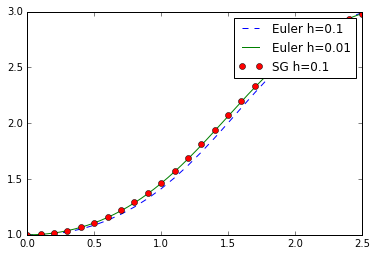

In [71]:
y_euler = euler1(ec_dif,1,2.5)
y_euler_01 = euler1(ec_dif,1,2.5,0.01)
y_seg = segundo_orden(ec_dif,1,2.5,d_ec_dif)
plot(y_euler[0],y_euler[1],'--',label="Euler h=0.1")
plot(y_euler_01[0],y_euler_01[1],label="Euler h=0.01")
plot(y_seg[0],y_seg[1],'o',label="SG h=0.1")
legend()
show()